Moral Circles
===

See the [accompanying blog post](https://levon003.github.io/2024/07/27/moral-circles.html).

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.cm
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [2]:
matplotlib.rcParams['figure.dpi'] = 150

In [3]:
dfs = pd.read_excel("waytz_2019_source_data.xlsx", sheet_name=None)
len(dfs)

6

In [4]:
dfs.keys()

dict_keys(['Figure 1', 'Figure 2', 'Figure 3', 'Figure 4', 'Figure 5', 'Figure 6'])

In [5]:
df4 = dfs["Figure 4"]
df5 = dfs["Figure 5"]
df4.shape, df5.shape

((131, 3), (131, 3))

In [6]:
df4.head(2)

,political ideology,human,nonhuman
0,5,9.666667,1.857143
1,4,9.777778,1.714286


In [7]:
df4 = df4.rename(columns={"political ideology": "political_ideology"})

In [8]:
# for the blog post: a markdown table with detailed ideology breakdown
print(df4.political_ideology.value_counts().sort_index().to_markdown())

|   political_ideology |   count |
|---------------------:|--------:|
|                    1 |      11 |
|                    2 |      35 |
|                    3 |      18 |
|                    4 |      31 |
|                    5 |      10 |
|                    6 |      16 |
|                    7 |      10 |


## Figure 4

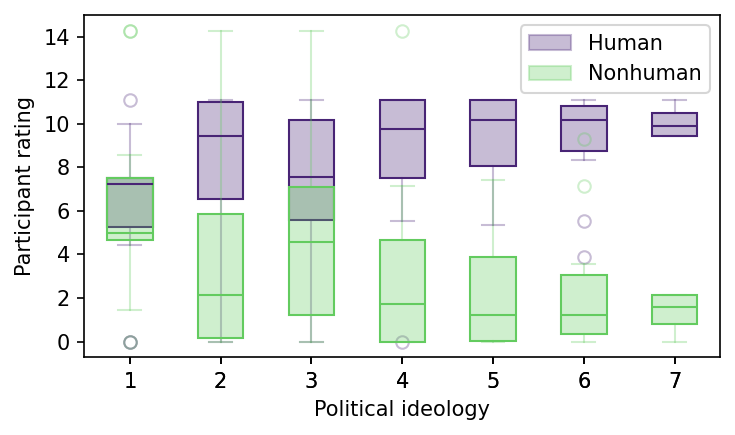

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
political_ideologies = np.array([1, 2, 3, 4, 5, 6, 7])
human_color = matplotlib.cm.viridis(0.1)
nonhuman_color = matplotlib.cm.viridis(0.76)

legend_patches = []
for category, color in (
    ("human", human_color), 
    ("nonhuman", nonhuman_color)):
    alphacolor = list(color)
    alphacolor[-1] = 0.3
    bplot= ax.boxplot(
        [df4[df4.political_ideology == p][category] for p in political_ideologies],
        meanline=False,
        patch_artist=True,
        flierprops={"markeredgecolor": alphacolor},
    )
    for key in bplot.keys():
        for patch in bplot[key]:
            if key in ["means", "boxes"]:
                patch.set_edgecolor(color)
                patch.set_facecolor(alphacolor)
            elif key == "medians":
                patch.set_color(color)
            else:
                patch.set_color(alphacolor)
    legend_patch = matplotlib.patches.Patch(color=alphacolor, label=category.capitalize())
    legend_patches.append(legend_patch)


ax.set_xlabel("Political ideology")
ax.set_ylabel("Participant rating")

ax.legend(handles=legend_patches)

fig.tight_layout()
plt.savefig("fig4_recreated.png", dpi=150)

plt.show()

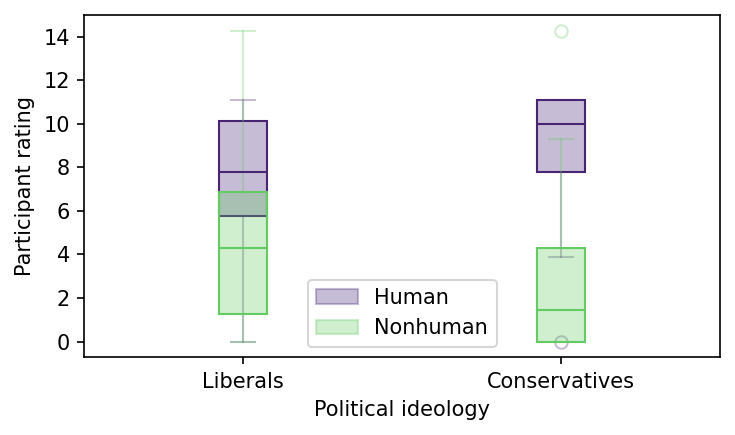

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
political_ideologies = np.array([1, 2, 3, 4, 5, 6, 7])
human_color = matplotlib.cm.viridis(0.1)
nonhuman_color = matplotlib.cm.viridis(0.76)

legend_patches = []
for category, color in (
    ("human", human_color), 
    ("nonhuman", nonhuman_color)):
    alphacolor = list(color)
    alphacolor[-1] = 0.3
    bplot= ax.boxplot(
        [df4[df4.political_ideology.isin(l)][category] for l in [(1, 2, 3), (4, 5, 6)]],
        meanline=False,
        patch_artist=True,
        flierprops={"markeredgecolor": alphacolor},
    )
    for key in bplot.keys():
        for patch in bplot[key]:
            if key in ["means", "boxes"]:
                patch.set_edgecolor(color)
                patch.set_facecolor(alphacolor)
            elif key == "medians":
                patch.set_color(color)
            else:
                patch.set_color(alphacolor)
    legend_patch = matplotlib.patches.Patch(color=alphacolor, label=category.capitalize())
    legend_patches.append(legend_patch)


ax.set_xlabel("Political ideology")
ax.set_ylabel("Participant rating")

ax.legend(handles=legend_patches)
ax.set_xticks([1, 2], ["Liberals", "Conservatives"])

fig.tight_layout()
plt.savefig("fig4_recreated2.png", dpi=150)

plt.show()

## Figure 5

In [11]:
df5 = df5.rename(columns={
    "political ideology": "political_ideology",
    "x-axis (heatmap)": "x",
    "y-axis (heatmap)": "y",
})
df5.columns

Index(['political_ideology', 'x', 'y'], dtype='object')

In [12]:
df5.sample(n=2)

,political_ideology,x,y
56,6,469,191
27,4,466,193


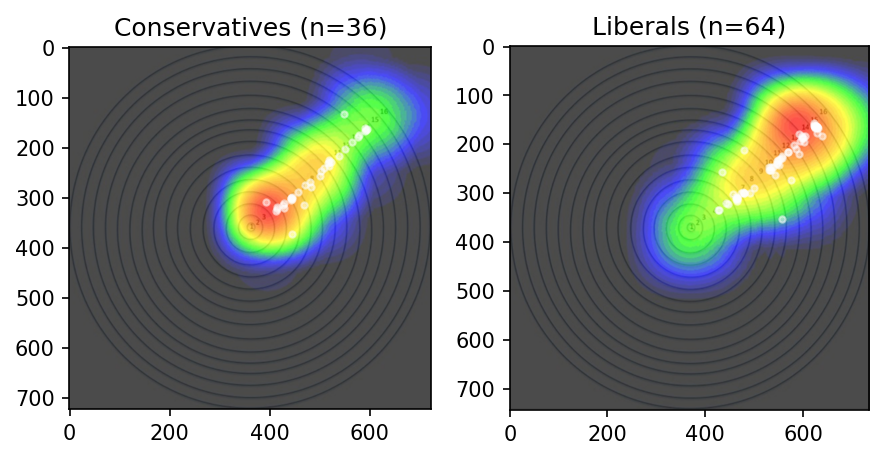

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

fig5_liberals = np.asarray(Image.open("fig5_liberals_cropped.png"))
fig5_conservatives = np.asarray(Image.open("fig5_conservatives_cropped.png"))

scatter_kwargs={
    "marker": ".",
    "alpha": 0.5,
    "color": "white",
}
xshift = 66
yshift = 65

ax = axes[0]
sdf = df5[df5.political_ideology >= 5]
ax.scatter(sdf.x + xshift - 35, sdf.y + yshift, **scatter_kwargs)
ax.set_title(f"Conservatives (n={len(sdf)})")
ax.imshow(fig5_conservatives)

ax = axes[1]
sdf = df5[df5.political_ideology <= 3]
ax.scatter(sdf.x + xshift, sdf.y + yshift, **scatter_kwargs)
ax.set_title(f"Liberals (n={len(sdf)})")
ax.imshow(fig5_liberals)

fig.tight_layout()
plt.savefig("fig5_recreated.png", dpi=150)

plt.show()

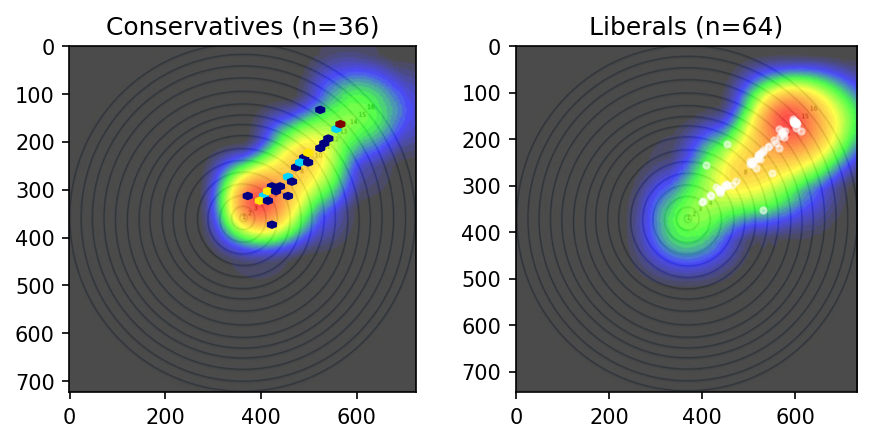

In [14]:
# briefly messing around with hexbins, but really the data is too sparse for this
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

fig5_liberals = np.asarray(Image.open("fig5_liberals_cropped.png"))
fig5_conservatives = np.asarray(Image.open("fig5_conservatives_cropped.png"))

scatter_kwargs={
    "marker": ".",
    "alpha": 0.5,
    "color": "white",
}

ax = axes[0]
sdf = df5[df5.political_ideology >= 5]
ax.imshow(fig5_conservatives)
ax.hexbin(sdf.x + 10, sdf.y + 65, gridsize=(12, 12), mincnt=1, cmap=matplotlib.cm.jet)
ax.set_title(f"Conservatives (n={len(sdf)})")


ax = axes[1]
sdf = df5[df5.political_ideology <= 3]
ax.scatter(sdf.x + 40, sdf.y + 65, **scatter_kwargs)
ax.set_title(f"Liberals (n={len(sdf)})")
ax.imshow(fig5_liberals)


plt.show()

In [15]:
def get_ideology_category(ideology: int) -> str:
    if ideology == 4:
        return "Moderate"
    elif ideology <= 3:
        return "Liberal"
    else:
        return "Conservative"
df5["ideology_category"] = df5.political_ideology.map(get_ideology_category)
df5.ideology_category.value_counts()

ideology_category
Liberal         64
Conservative    36
Moderate        31
Name: count, dtype: int64

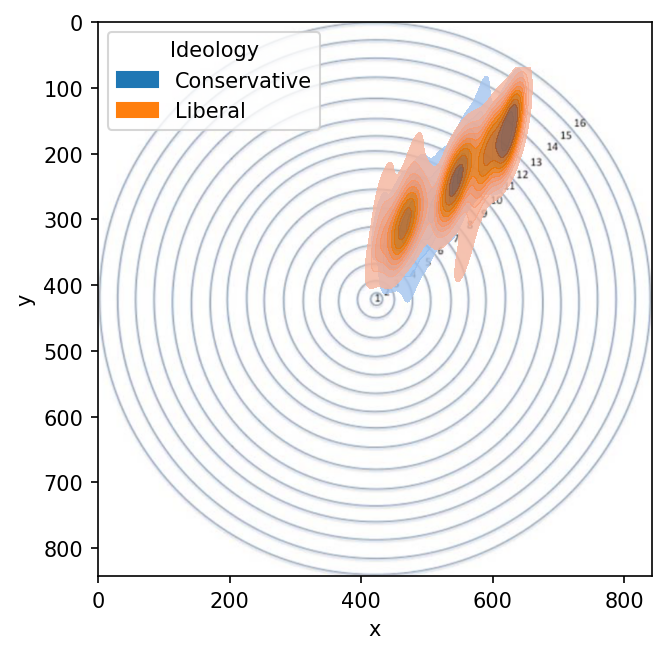

In [16]:
sdf = df5[df5.ideology_category != "Moderate"].copy()
sdf["x"] += 65
sdf["y"] += 65
sdf = sdf.rename(columns={"ideology_category": "Ideology"})

ax = sns.kdeplot(data=sdf, x="x", y="y", hue="Ideology", fill=True, alpha=0.8)
fig5_plain = np.asarray(Image.open("fig5_plain.png"))
ax.imshow(fig5_plain)
sns.move_legend(ax, "upper left")
plt.show()

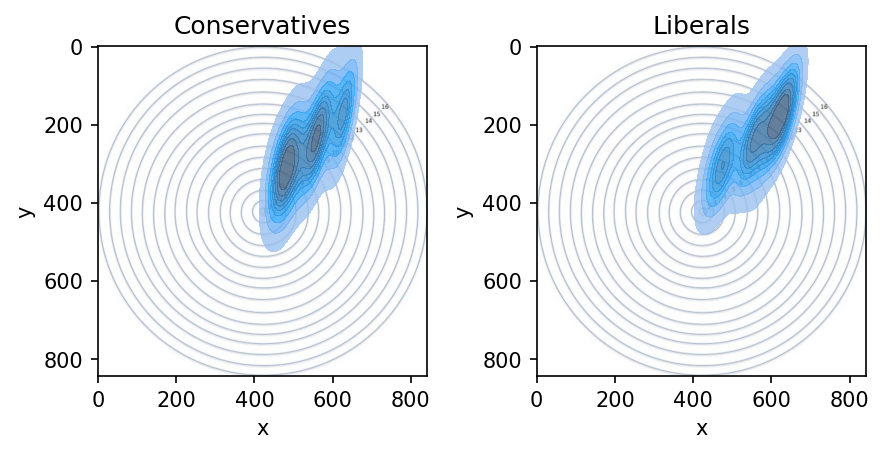

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

fig5_plain = np.asarray(Image.open("fig5_plain.png"))

sdf = df5[df5.ideology_category != "Moderate"].copy()
# I have no idea if these numbers are right; this is based on eye-balling
sdf["x"] += 75
sdf["y"] += 65
sdf = sdf.rename(columns={"ideology_category": "Ideology"})

ax = axes[0]
ax = sns.kdeplot(data=sdf[sdf.Ideology == "Conservative"], x="x", y="y", fill=True, ax=ax, alpha=0.8, bw_adjust=2)
ax.imshow(fig5_plain)
ax.set_title("Conservatives")

ax = axes[1]
ax = sns.kdeplot(data=sdf[sdf.Ideology == "Liberal"], x="x", y="y", fill=True, ax=ax, alpha=0.8, bw_adjust=2)
ax.imshow(fig5_plain)
ax.set_title("Liberals")

fig.tight_layout()
plt.savefig("fig5_recreated2.png", dpi=150)
plt.show()

81.8413098624405 337.12460604352214


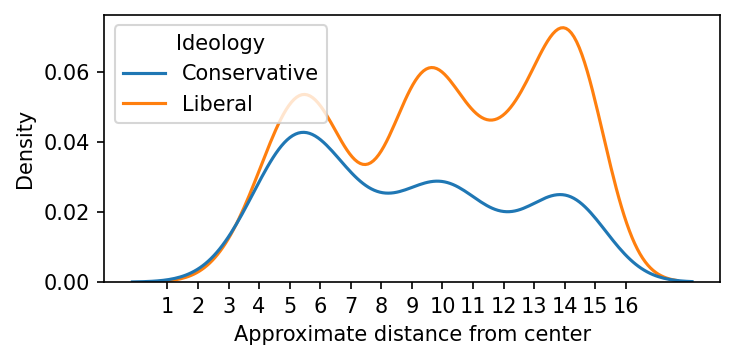

In [18]:
sdf = df5[df5.ideology_category != "Moderate"].copy()
# I have no idea if these numbers are right; this is based on eye-balling
sdf["x"] += 75
sdf["y"] += 65
sdf = sdf.rename(columns={"ideology_category": "Ideology"})

# identified the center from manual investigation on the previous figure
#ax.scatter(422, 420, marker="x", color="black")
center_x, center_y = 422, 420
distances = np.sqrt(np.square(sdf.x - center_x) + np.square(sdf.y - center_y))
sdf["distance"] = distances

print(sdf.distance.min(), sdf.distance.max())
# from visual inspection, max value is about 14.5
# rescale so that the x-axis corresponds roughly to the circles
sdf["rescaled_distance"] = sdf.distance * (14.5 / sdf.distance.max())

# make plot
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))

ax = sns.kdeplot(data=sdf, x="rescaled_distance", hue="Ideology", bw_adjust=0.7)
#ax.hist(sdf.rescaled_distance, bins=80, density=True)
ax.set_xlabel("Approximate distance from center")
ax.set_xticks(np.arange(1, 17))

fig.tight_layout()
plt.savefig("fig5_distances.png", dpi=150)

plt.show()

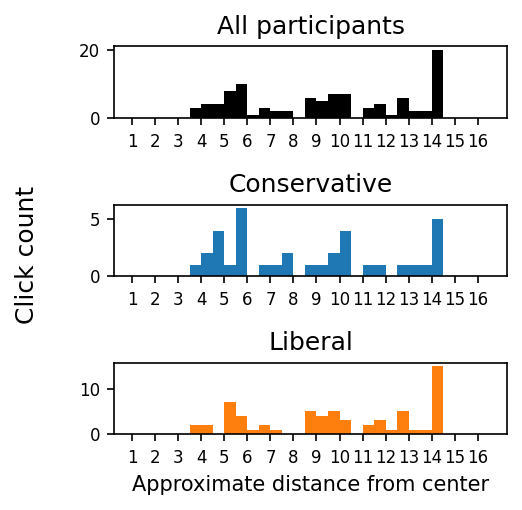

In [19]:
sdf = df5[df5.ideology_category != "Moderate"].copy()
# I have no idea if these numbers are right; this is based on eye-balling
sdf["x"] += 75
sdf["y"] += 65
sdf = sdf.rename(columns={"ideology_category": "Ideology"})

# identified the center from manual investigation on the previous figure
#ax.scatter(422, 420, marker="x", color="black")
center_x, center_y = 422, 420
distances = np.sqrt(np.square(sdf.x - center_x) + np.square(sdf.y - center_y))
sdf["distance"] = distances

# from visual inspection, max value is about 14.5
# rescale so that the x-axis corresponds roughly to the circles
sdf["rescaled_distance"] = sdf.distance * (14.5 / sdf.distance.max())

# make plot
fig, axes = plt.subplots(3, 1, figsize=(3.5, 3.5))

bins = np.arange(1, 17, 0.5)

ax = axes[0]
ax.hist(sdf.rescaled_distance, bins=bins, color="Black")
ax.set_xticks(np.arange(1, 17))
ax.set_title("All participants")
ax.tick_params(axis='both', which='major', labelsize=8)

ax = axes[1]
ax.hist(sdf[sdf.Ideology == "Conservative"].rescaled_distance, bins=bins)
ax.set_xticks(np.arange(1, 17))
ax.set_title("Conservative")
ax.tick_params(axis='both', which='major', labelsize=8)

ax = axes[2]
ax.hist([0], bins=bins)
ax.hist(sdf[sdf.Ideology == "Liberal"].rescaled_distance, bins=bins)
ax.set_xticks(np.arange(1, 17))
ax.set_title("Liberal")
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xlabel("Approximate distance from center")
fig.supylabel("Click count")

fig.tight_layout()
plt.savefig("fig5_distances2.png", dpi=150)

plt.show()